The meaning of the differential equation 

$$
\frac{\mathrm{d}V}{\mathrm{d}t} = \alpha(V-\beta)
$$
whose solution, by the way, is:
$$
V(t) = \beta + e^{\alpha t}
$$


is that there is an exponentially growing or decaying (if $\alpha < 0$) and growing (if $\alpha > 0$) from an initial condition $\beta-1$

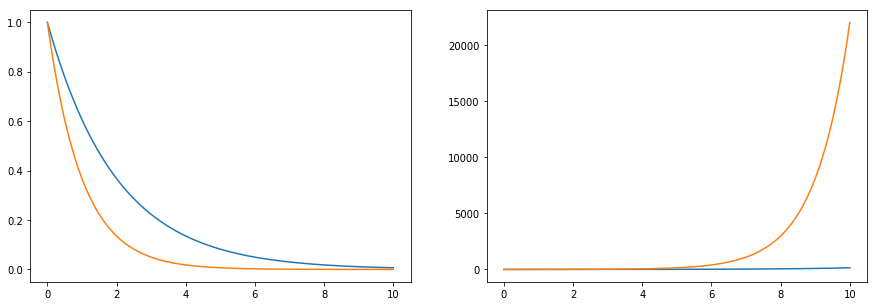

In [2]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 10, 1000);
alpha0 = -0.5;
alpha1 =  0.5;
init_c0 = 1
init_c1 = 1
beta0 = init_c0 - 1;
beta1 = init_c1 - 1;

plt.figure(figsize=(15,5))
plt.subplot(121)
V0 = beta0 + np.exp(alpha0*t);
V1 = beta0 + np.exp(alpha0*2*t);
plt.plot(t, V0, t, V1)

plt.subplot(122)
V0 = beta1 + np.exp(alpha1*t);
V1 = beta1 + np.exp(alpha1*2*t);
plt.plot(t, V0, t, V1)

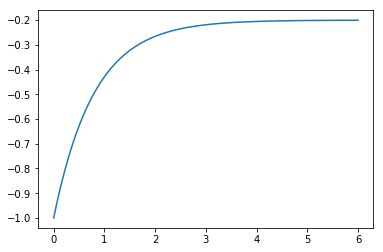

In [4]:
import numpy as np
import matplotlib.pyplot as plt

nV = -0.2
C = 0.8
t = np.linspace(0,6,100)
tau = 0.8

n = nV - C*np.exp(-t/tau)

plt.plot(t,n)

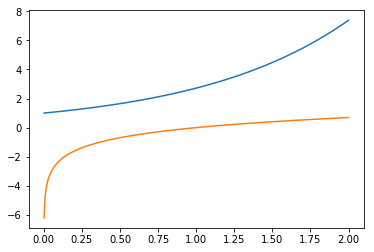

In [11]:
x = np.linspace(0,2,1000)
x = x[1:]
y0 = np.exp(x)
y1 = np.log(x)
plt.plot(x,y0,x,y1)


In [70]:
V = 0.05
a = (0.01*(V + 55))/(1-np.exp(-0.1*(V + 55)))
b = 0.125*np.exp(-0.0125*(V + 65))

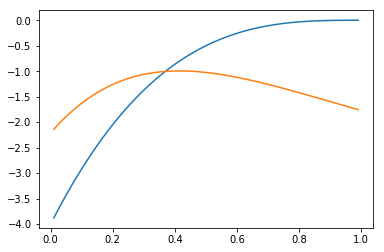

In [71]:
n = np.linspace(0.01, 0.99, 100)
q1 = -4*(1-n)**3
q2 = b*4*n*(1-3)**3 - 4*a*(1-n)**4

plt.plot(n, q1, n, q2)

Text(0.5,1,'Figure 5.14')

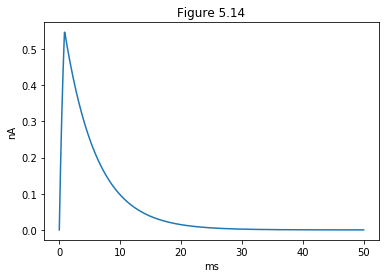

In [91]:
alpha = 0.93 # 1/ms
beta = 0.19  # 1/ms
T = 0.9      # ms
Te = 50 # duration of simulation, ms
Ps0 = 0 # initial probalibity
t = np.linspace(0, Te, 1000)
Ps = np.zeros_like(t)
for n in range(len(t)):
    if t[n] <= T:
        Ps[n] = 1 + (Ps0 - 1) * np.exp(-alpha*t[n]) # Eq. 5.28
        PsT = Ps[n] 
    else:
        Ps[n] = PsT * np.exp(-beta*(t[n]-T))        # Eq. 5.29
plt.plot(t, Ps)
plt.xlabel('ms')
plt.ylabel('nA')
plt.title('Figure 5.14')

Let's solve it numerically (Eq. 5.27):
$$
\boxed{\frac{dP_s}{dt} = \alpha_s (1 - P_s) - \beta P_s}
$$

let's multiply both sides by $dt$, set $dt$ to a small value, set $P_s$ to some initial value (say, 0):

$$
dP_s = (\alpha_s (1 - P_s) - \beta P_s)dt
$$

Text(0.5,1,'Figure 5.14')

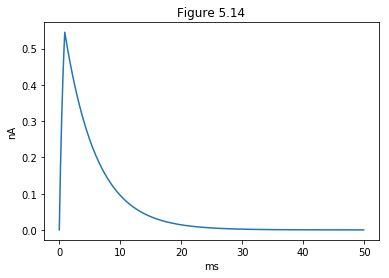

In [114]:
def get_next_Ps(decay, P_s, alpha, beta, dt):
    if decay==0:
        dP_s = (alpha*(1 - P_s) - beta*P_s)*dt
    else:
        dP_s = -beta*P_s*dt
    return P_s + dP_s

P_s0 = 0 # initial probalibity
alpha = 0.93 # 1/ms
beta = 0.19  # 1/ms
T = 0.9      # ms
Te = 50 # duration of simulation, ms
dt = 0.1
t = np.arange(0, Te, dt)
P_s = np.zeros_like(t)


# ravel, zip, *, **
P_s[0] = P_s0
for i in range(1, len(t)):
    decay=0 if t[i]<=T else 1
    P_s[i] = get_next_Ps(decay, P_s[i-1], alpha, beta, dt)
plt.plot(t, P_s)
plt.xlabel('ms')
plt.ylabel('nA')
plt.title('Figure 5.14')

In [25]:
class Neuron():
    def __init__(self, V0=-60):
        # neuron's electric constants:
        self.Ie = 0.20 # external current
        self.Cm = 0.05 # membrane capacitance

        """ currents carried across the membrane by ion pumps that maintain the 
        concentration gradients.By convention, the membrane current is defined 
        as positive when positive ions leave the neuron and negative when positive 
        ions enter the neuron."""
        
        self.Ena = 55  # equilibrium potential for sodium (see Dayan, Abbott, pp. 169-179)
        self.Ek = -72  # equilibrium potential for potassium (potassium pumps push K+ ions into the 
                       # neuron (negative current) and Na+ ions out of the neuron (positive current).
        self.El = -49  # equilibrium potential for leakage

        # maximum conductance ofchannels of k-th type (depends on a conductance of one 
        # opened channel and on a number of channels in the membrane)
        self.gNabar = 1.2
        self.gKbar = 0.36
        self.glbar = 0.003

        # Intial conditions
        self.V = V0 # intial membrane voltage

        # (alphas) probabilities of the domains' (n,m,h) transition to the open state:
        # see Dayan & Abbott, pp. 181-182
        self.an = 0.01*(self.V+55)/(1-np.exp(-0.1*(self.V+55)))
        self.am = 0.1*(self.V+40)/(1-np.exp(-0.1*(self.V+40)))
        self.ah = 0.07*np.exp(-0.05*(self.V+65))

        # (betas) probabilities of the domains' (n,m,h) transition to the closed state:
        # see Dayan & Abbott, pp. 181-182
        self.bn = 0.125*np.exp(-0.0125*(self.V+65))
        self.bm = 4*np.exp(-0.0556*(self.V+65))
        self.bh = 1/(1+np.exp(-0.1*(self.V+35)))

        # intial equilibrium probability of the opened state:
        self.n = self.an/(self.an+self.bn) # the probability of a subunit of a potassium channel being open (there're four sub-units)
        self.m = self.am/(self.am+self.bm) # the 'swinging' gate on the sodium channel (3 sub-units)
        self.h = self.ah/(self.ah+self.bh) # the 'ball' plug on the sodium channel (1 sub-unit)

    def step(self, dt):
        """
        MAKE ONE TIME STEP TO UPDATE THE NEURON'S PARAMETERS
        """
        for i in range(len(t)):
            self.dm = dt*(self.am*(1-self.m)-self.bm*self.m);
            self.dn = dt*(self.an*(1-self.n)-self.bn*self.n);
            self.dh = dt*(self.ah*(1-self.h)-self.bh*self.h);

            self.m = self.m + self.dm;
            self.n = self.n + self.dn;
            self.h = self.h + self.dh;

            # Hodgkin-Huxley model: dV/dt is membrane current.
            # We multiply the ODE by dt/Cm to solve numerically: 
            dV = (-self.gKbar  *self.n**4 *(self.V-self.Ek)
                  -self.gNabar *self.m**3 *CN.h*(self.V-self.Ena)
                  -self.glbar  *(self.V-self.El) + self.Ie)/self.Cm*dt

        #     Ik(i) = gKbar*n^4*(V0-Ek);
        #     INa(i) = gNabar*m^3*h*(V0-Ena);
        #     Il(i) = glbar*(V0-El);              % leakage current

            self.V = self.V + dV

            self.an = 0.01*(self.V+55)/(1-np.exp(-(self.V+55)/10))
            self.am = 0.1*(self.V+40)/(1-np.exp(-(self.V+40)/10))
            self.ah = 0.07*np.exp(-0.05*(self.V+65))

            self.bn = 0.125*np.exp(-(self.V+60)/80)
            self.bm = 4*np.exp(-0.0556*(self.V+60))
            self.bh = 1/(1+np.exp(-0.1*(self.V+30)))
            
            return self.V

In [29]:
# create a list of neuron objects:
neurons = []
for i in range(2):
    neurons.append(Neuron())

# Change some default initialization parameters:
neurons[0].Ie = 0.14
neurons[1].Ie = 0.5

neuron 0: 	initial_state:  -61.973451835954975 	final_state: -66.39393987935603
neuron 1: 	initial_state:  -51.332824733763914 	final_state -53.06439405826756


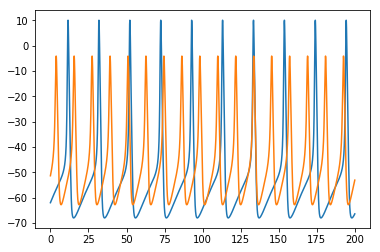

In [31]:
# Simulate the neurons for a specified time. You can re-run the simulation (re-run this cell)
# in which case the simulation will resume from the final state in the previous run. 

T = 200 # length of simulation, ms
dt = 0.01 # time step in milliseconds

t = np.arange(0, T, step=dt)
VV = np.zeros((len(neurons), len(t)))
for tt in range(len(t)):
    for n in range(len(neurons)):
        CN = neurons[n]
        VV[n,tt] = CN.step(dt)
for i in range(len(neurons)):
    plt.plot(t, VV[i,:])
print('neuron 0:', '\tinitial_state: ', VV[0,0], '\tfinal_state:', VV[0,-1])
print('neuron 1:', '\tinitial_state: ', VV[1,0], '\tfinal_state', VV[1,-1])

neuron 0: 	initial_state:  -66.3814668557535 	final_state: -65.38503525959202
neuron 1: 	initial_state:  -53.035912076492735 	final_state -54.69974848427009


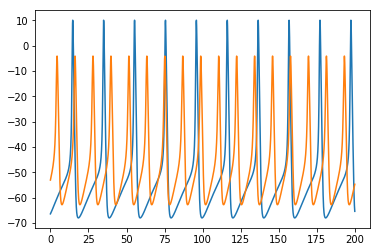

In [32]:
# Simulate the neurons for a specified time. You can re-run the simulation (re-run this cell)
# in which case the simulation will resume from the final state in the previous run. 

T = 200 # length of simulation, ms
dt = 0.01 # time step in milliseconds

t = np.arange(0, T, step=dt)
VV = np.zeros((len(neurons), len(t)))
for tt in range(len(t)):
    for n in range(len(neurons)):
        CN = neurons[n]
        VV[n,tt] = CN.step(dt)
for i in range(len(neurons)):
    plt.plot(t, VV[i,:])
print('neuron 0:', '\tinitial_state: ', VV[0,0], '\tfinal_state:', VV[0,-1])
print('neuron 1:', '\tinitial_state: ', VV[1,0], '\tfinal_state', VV[1,-1])